In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, f1_score
from lightgbm import LGBMClassifier, plot_importance
import shap

import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams['font.family']= 'AppleGothic' 
matplotlib.rcParams['font.size']= 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
cancer = load_breast_cancer()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=220)

In [10]:
model = LGBMClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 3)

In [11]:
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 287, number of negative: 168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.630769 -> initscore=0.535518
[LightGBM] [Info] Start training from score 0.535518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(max_depth=3, n_estimators=400)

In [13]:
y_pred = model.predict(X_test)

In [14]:
confusion = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [15]:
print(confusion)
print()
print(f1)

[[41  3]
 [ 0 70]]

0.9790209790209791


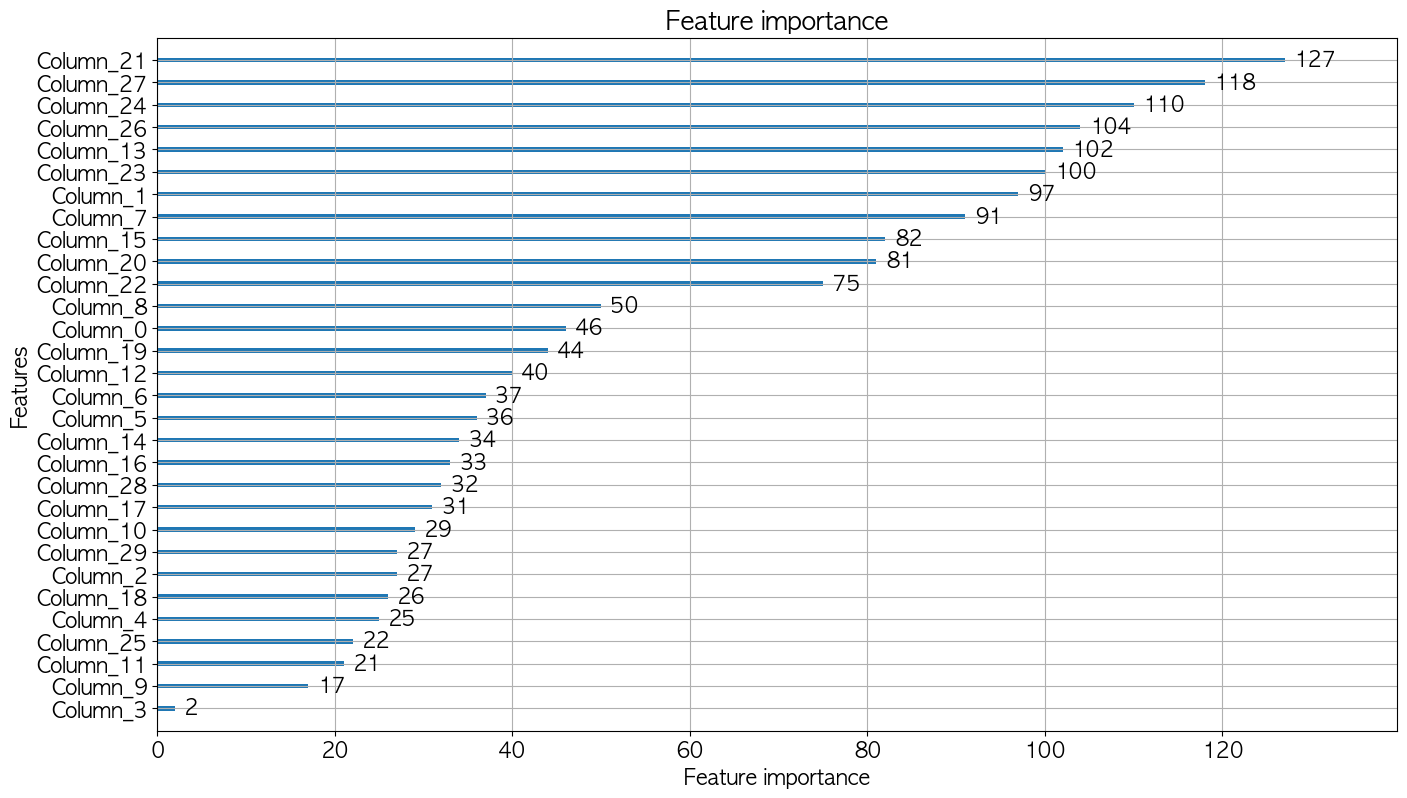

In [21]:
# 특성 중요도
plot_importance(model, figsize=(16, 9))
plt.show()

In [46]:
# Tree model Shap Value 확인 객체 지정
explainer = shap.TreeExplainer(model)

# Shap Values 계산
shap_values = explainer.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [57]:
# javascript 초기화 (graph 초기화)
shap.initjs() 
shap.plots.force(explainer.expected_value[0], shap_values[0])

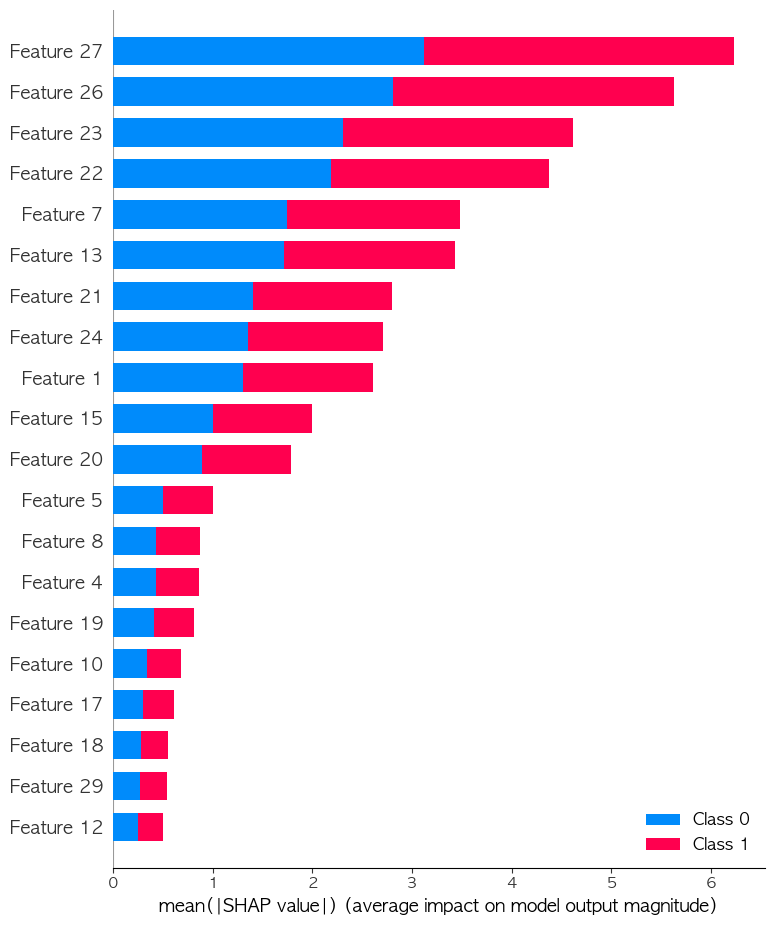

In [63]:
# summary
shap.summary_plot(shap_values, X_test)

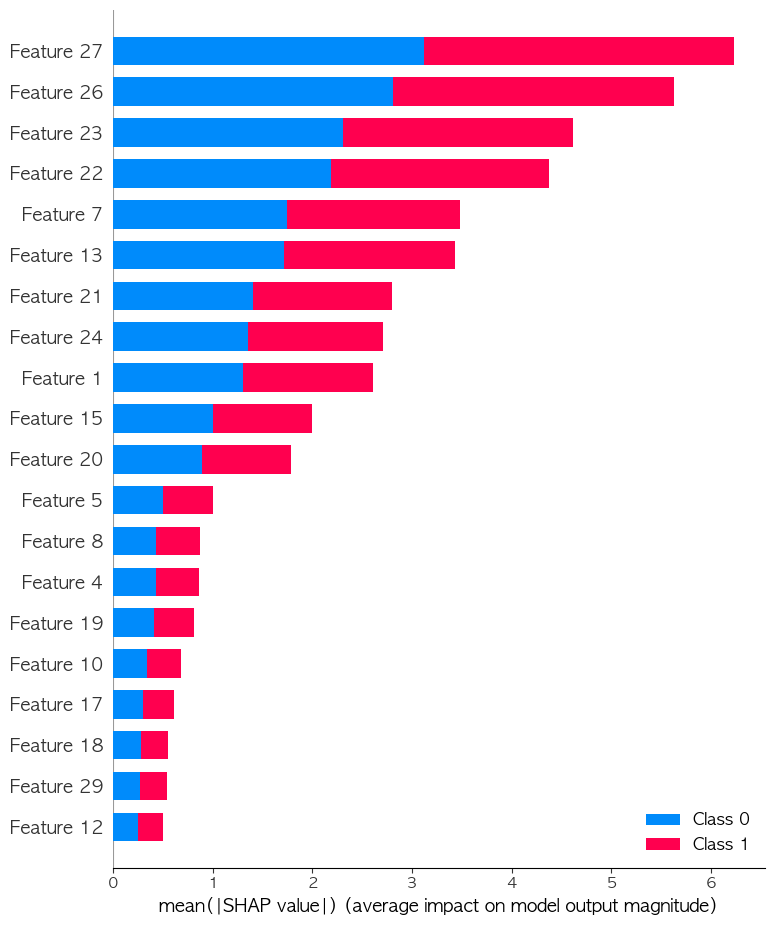

In [60]:
# 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, X_test, plot_type = "bar")